# 1. PCA using sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [5]:
data = pd.read_csv("../unsupervised_learning_clustering_part1/data/mnist_train.csv")

In [8]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

In [13]:
pca = PCA()
reduced = pca.fit_transform(X_train)

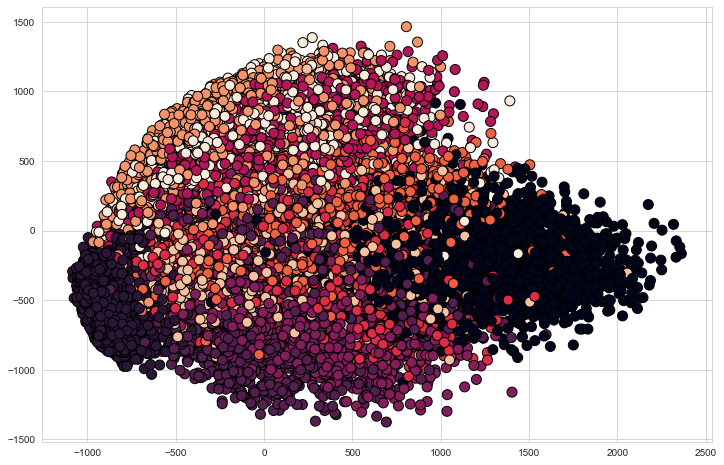

In [43]:
plt.figure(figsize=(12, 8))
plt.scatter(reduced[:, 0], reduced[:, 1], s=100, c=y_train, alpha=1, edgecolor="black")
# plt.scatter(reduced[:, 0], reduced[:, 1], s=100, c=y_train, alpha=.5, edgecolor="black")
plt.show()

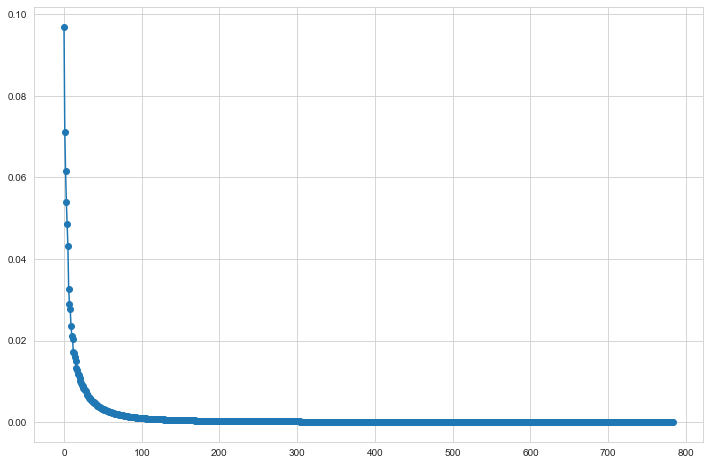

In [42]:
plt.figure(figsize=(12, 8))
plt.plot(pca.explained_variance_ratio_, marker="o")
plt.show()

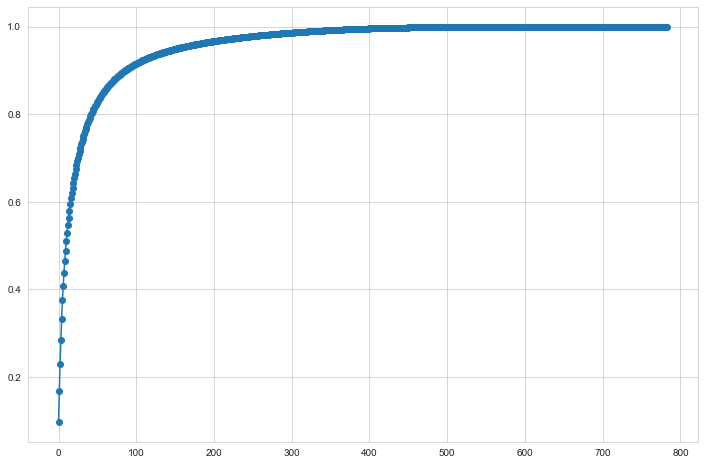

In [38]:
# cumulative variance
# choose k = number of dimensions that gives us 95-99% variance
cumulative = []
last = 0
for v in pca.explained_variance_ratio_:
    cumulative.append(last + v)
    last = cumulative[-1]

plt.figure(figsize=(12, 8))
plt.plot(cumulative, marker="o")
plt.show()

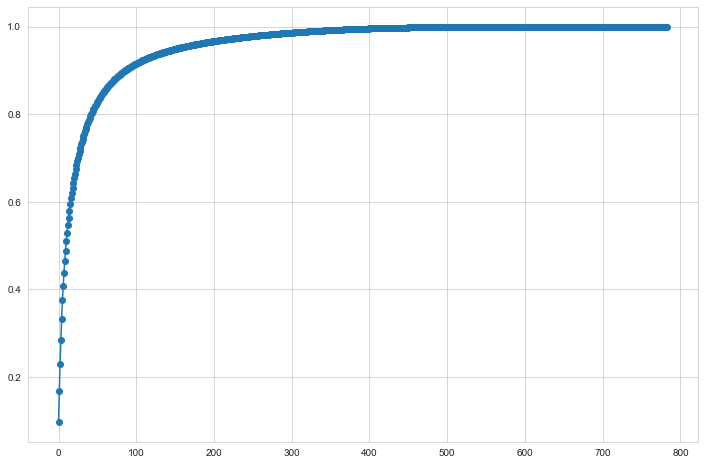

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.show()

# 2. Implementation of PCA

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, shuffle=True)

In [49]:
# decompose the covariance
cov_x = np.cov(X_train.T)
# lambdas are sorted in ascending order
# q is eigenvector
lambdas, Q = np.linalg.eigh(cov_x)

In [65]:
# lambdas are sorted from smallest --> largest
# some may be slightly negative due to precision ?
# get index of lambdas in sorted order, negative becaise we want to do it in descending order
idx = np.argsort(-lambdas)
lambdas = lambdas[idx] # sort in proper order
lambdas = np.maximum(lambdas, 0) # get rid of negatives
# sort eigenvectirs also in descending order
Q = Q[:,idx]

In [66]:
# plot the first 2 columns of Z
Z = X_train.dot(Q)

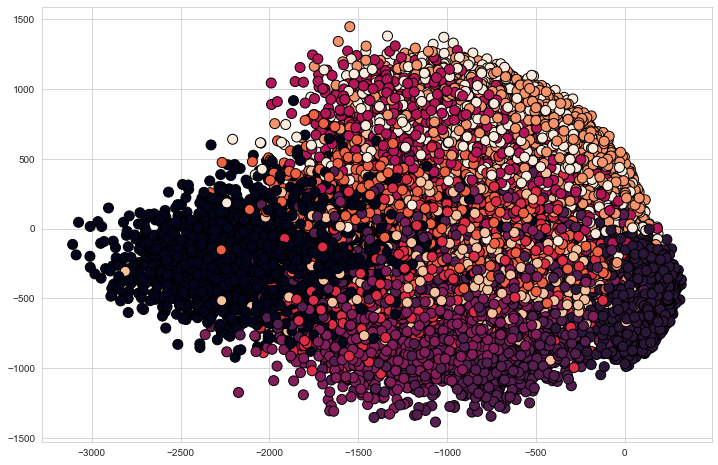

In [67]:
plt.figure(figsize=(12, 8))
plt.scatter(Z[:,0], Z[:,1], s=100, c=y_train, alpha=1, edgecolor="black")
plt.show()

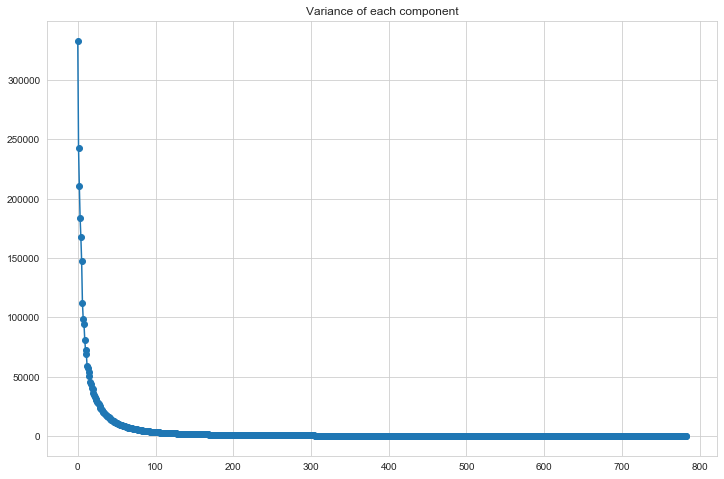

In [68]:
# plot variances
plt.figure(figsize=(12, 8))
plt.plot(lambdas, marker="o")
plt.title("Variance of each component")
plt.show()

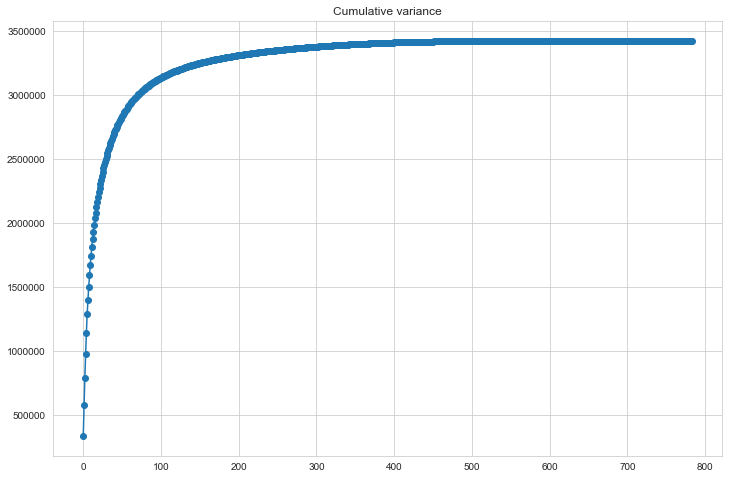

In [70]:
# cumulative variance
plt.figure(figsize=(12, 8))
plt.plot(np.cumsum(lambdas), marker="o")
plt.title("Cumulative variance")
plt.show()

# 3. PCA vs Truncated SVD

In [71]:
from sklearn.decomposition import PCA, TruncatedSVD

In [76]:
m = X.mean(axis=0)
s = X.std(axis=0)
np.place(s, s == 0, 1)
X = (X - m) / s

pca = PCA()
svd = TruncatedSVD()

In [77]:
Z1 = pca.fit_transform(X)
Z2 = svd.fit_transform(X)

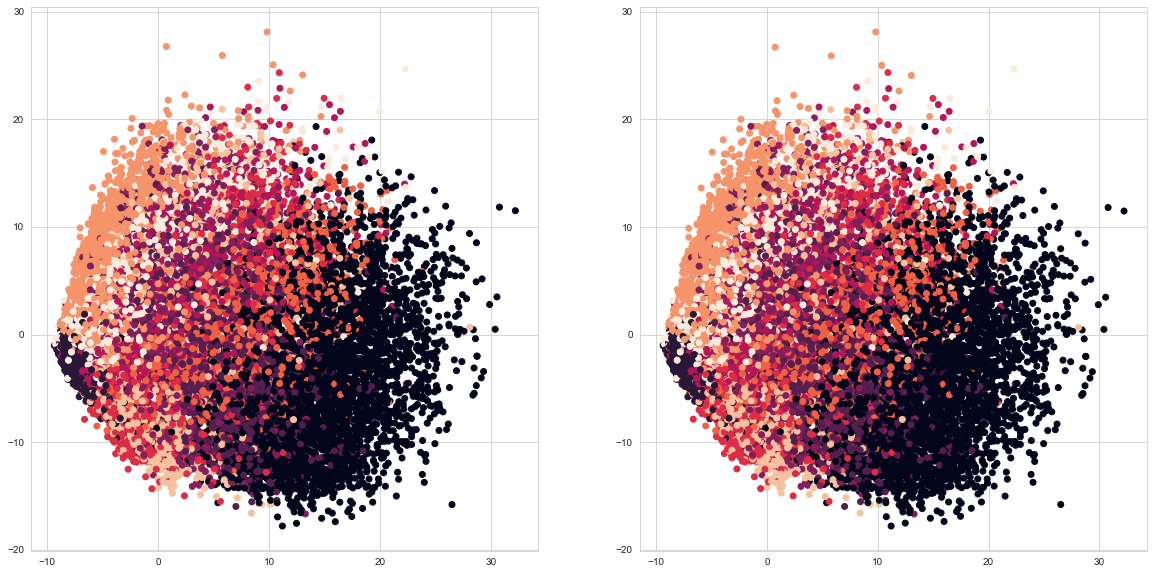

In [78]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.scatter(Z1[:,0], Z1[:,1], c=y)
plt.subplot(1,2,2)
plt.scatter(Z2[:,0], Z2[:,1], c=y)
plt.show()

In [ ]:
# Exact same it seems